In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyarrow
import plotly.express as px

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet()
df.head(2)

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km)
0,148534149,NL,IP-C519_2022_00007-WF0-1,FORD,FORD WERKE GMBH,FORD-WERKE GMBH,NaN,e13*2007/46*1911*17,DEH,R0DB1PX,...,2.1,NaN,NaN,P,2024,2024-01-05,5.3,EURO 6 EA,RL-C519_2019_00001-WF0-0,NaN
1,148534150,NL,IP-ZKU____REDU7G61-VF3,STELLANTIS,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,NaN,e2*2007/46*0532*21,V,S,...,NaN,NaN,NaN,P,2024,2024-10-10,NaN,AX,RL-___MP2CREDU7761-VR3,343.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(df.shape)
#Beaucoup de lignes, 40 colonnes.

(10779681, 40)


In [ ]:
print(df.dtypes)

ID                        int64
Country                  object
VFN                      object
Mp                       object
Mh                       object
Man                      object
MMS                     float64
Tan                      object
T                        object
Va                       object
Ve                       object
Mk                       object
Cn                       object
Ct                       object
Cr                       object
r                         int64
m (kg)                  float64
Mt                      float64
Enedc (g/km)            float64
Ewltp (g/km)            float64
W (mm)                  float64
At1 (mm)                float64
At2 (mm)                float64
Ft                       object
Fm                       object
ec (cm3)                float64
ep (KW)                 float64
z (Wh/km)               float64
IT                       object
Ernedc (g/km)           float64
Erwltp (g/km)           float64
De      

=== Identité / Information générale ===

ID =
Identifiant unique de la ligne / du véhicule.

Country =
Pays de commercialisation ou d’immatriculation.

Status =
Statut administratif : actif, retiré, production, homologué, etc.

year =
Année du modèle ou d’immatriculation.

Date of registration =
Date d’immatriculation (souvent format texte).

VFN =
Version French Name (ou Vehicle Full Name) → nom complet du modèle.

Man =
Marque du véhicule (manufacturer).

Mk =
Marque ou code marque (variant).

Cn =
Code modèle (constructeur).

Cr / Ct =
Code carrosserie ou classification technique (selon base).

Tan, T, Va, Ve =
Codes techniques internes du constructeur (souvent type variant/version).

IT =
Type d'énergie : essence/diesel/hybride/électrique (selon nomenclature locale).

ech =
Type de chaîne cinématique (souvent moteur thermique / hybride / électrique).

RLFI =
Code fiscal / réglementation locale (peut être lié aux class. d'émissions).

Mp, Mh =
Motorisation primaire (Mp) / secondaire (Mh) dans le cas des hybrides.

=== Caractéristiques techniques ===

m (kg) =
Masse du véhicule en ordre de marche (poids).

W (mm) =
Largeur du véhicule en millimètres.

At1 (mm) =
Voie avant (largeur essieu avant).

At2 (mm) =
Voie arrière (largeur essieu arrière).

ec (cm3) =
Cylindrée moteur en centimètres cubes.

ep (KW) =
Puissance maximale du moteur (kW).

z (Wh/km) =
Consommation électrique en Wh/km (véhicules électriques).

Mt =
Masse technique maximale admissible / PTAC (selon base).

MMS =
Masse à vide minimale (selon base).

Vf =
Vitesse maximale (selon base).

De =
Consommation d'énergie (kWh/100 ou similaire selon norme).

=== Conso / Émissions ===

Enedc (g/km) =
Émissions CO₂ selon norme NEDC (ancienne méthode).

Ewltp (g/km) =
Émissions CO₂ selon norme WLTP (méthode actuelle).

Ernedc (g/km) =
Émissions CO₂ en cycle “run” NEDC (valeur dérivée).

Erwltp (g/km) =
Émissions CO₂ en cycle “run” WLTP (valeur dérivée).

Fuel consumption ou **Fuel consumption ** (avec espace) =
Consommation carburant (souvent en L/100km).

=== Électrification ====

Electric range (km) =
Autonomie électrique (WLTP ou NEDC selon dataset).

In [ ]:
colonnes_num = df.select_dtypes(include=["int64","float64"]).columns.tolist()
colonnes_cat = df.select_dtypes(include=["object"]).columns.tolist()

print("Colonnes numériques :", colonnes_num)
print("Colonnes catégorielles :", colonnes_cat)


Colonnes numériques : ['ID', 'MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'year', 'Fuel consumption ', 'Electric range (km)']
Colonnes catégorielles : ['Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'Ft', 'Fm', 'IT', 'Status', 'Date of registration', 'ech', 'RLFI']


In [ ]:
resume = pd.DataFrame(index=df.columns)

resume["type"] = df.dtypes.astype(str)
resume["nb_na"] = df.isna().sum()
resume["pct_na"] = (df.isna().sum() / len(df) * 100).round(2)
resume["nb_uniques"] = df.nunique()

exemples = []
for col in df.columns:
    exemples.append(", ".join(map(str, df[col].dropna().unique()[:3])))
resume["exemples"] = exemples

resume

,type,nb_na,pct_na,nb_uniques,exemples
ID,int64,0,0.00,10779681,"148534149, 148534150, 148534151"
Country,object,0,0.00,29,"NL, SE, NO"
VFN,object,372515,3.46,7746,"IP-C519_2022_00007-WF0-1, IP-ZKU____REDU7G61-V..."
Mp,object,686704,6.37,11,"FORD, STELLANTIS, VOLVO CARS POLESTAR SUZUKI"
Mh,object,0,0.00,116,"FORD WERKE GMBH, AUTOMOBILES PEUGEOT, VOLVO"
Man,object,0,0.00,115,"FORD-WERKE GMBH, AUTOMOBILES PEUGEOT, VOLVO CA..."
MMS,float64,10779681,100.00,0,
Tan,object,947,0.01,7253,"e13*2007/46*1911*17, e2*2007/46*0532*21, e4*20..."
T,object,8244,0.08,2047,"DEH, V, Z"
Va,object,30164,0.28,5037,"R0DB1PX, S, ZSH4"


In [ ]:
df[colonnes_num].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10779681.0,1.521201e+08,5.495697e+06,137592001.0,147811137.0,151192152.0,1.575069e+08,161062667.0
MMS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r,10779681.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0
m (kg),10779162.0,1.560132e+03,3.656444e+02,513.0,1280.0,1484.0,1.773000e+03,4800.0
Mt,10463662.0,1.668003e+03,3.795869e+02,317.0,1381.0,1590.0,1.892000e+03,4574.0
Enedc (g/km),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ewltp (g/km),10758184.0,1.068796e+02,5.793564e+01,0.0,101.0,123.0,1.370000e+02,543.0
W (mm),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At1 (mm),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At2 (mm),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in colonnes_cat:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(5))


--- Country ---
Country
DE    2728237
FR    1820622
IT    1555384
ES    1055935
PL     539777
Name: count, dtype: int64

--- VFN ---
VFN
IP-03_312_0344-ZFA-1      180041
IP-HNE____MB6D542C-VR3    109708
IP-JAA1MTPJT4A_000-VF1     95999
IP-0110-JT1                88932
IP-0153-JT1-1              64117
Name: count, dtype: int64

--- Mp ---
Mp
VOLKSWAGEN                   2833686
STELLANTIS                   1735070
RENAULT-NISSAN-MITSUBISHI    1466546
SUBARU-MAZDA-TOYOTA          1033199
BMW                           721039
Name: count, dtype: int64

--- Mh ---
Mh
VOLKSWAGEN         1159715
STELLANTIS AUTO     977657
RENAULT             760319
BMW AG              698346
SKODA               665921
Name: count, dtype: int64

--- Man ---
Man
VOLKSWAGEN AG                  1159974
STELLANTIS AUTO SAS             977867
RENAULT SAS                     760533
BAYERISCHE MOTOREN WERKE AG     698480
SKODA AUTO AS                   666183
Name: count, dtype: int64

--- Tan ---
Tan
e19*2007/46*00

FOCUS VISUEL UNIQUEMENT SUR CERTAINES DATA CLEFS

In [ ]:
colonnes_minimal = [
    "Enedc (g/km)",
    "Ewltp (g/km)",
    "Fuel consumption ",
    "Electric range (km)",
    "ep (KW)",
    "m (kg)",
    "year"
]

df_min = df[colonnes_minimal].copy()

df_min.shape, df_min.head()

((10779681, 7),
    Enedc (g/km)  Ewltp (g/km)  Fuel consumption   Electric range (km)  \
 0           NaN         121.0                5.3                  NaN   
 1           NaN           0.0                NaN                343.0   
 2           NaN          16.0                0.7                 93.0   
 3           NaN         123.0                5.4                  NaN   
 4           NaN         108.0                4.8                  NaN   
 
    ep (KW)  m (kg)  year  
 0     92.0  1440.0  2024  
 1    100.0  2267.0  2024  
 2    186.0  2039.0  2024  
 3     92.0  1466.0  2024  
 4     53.0  1020.0  2024  )

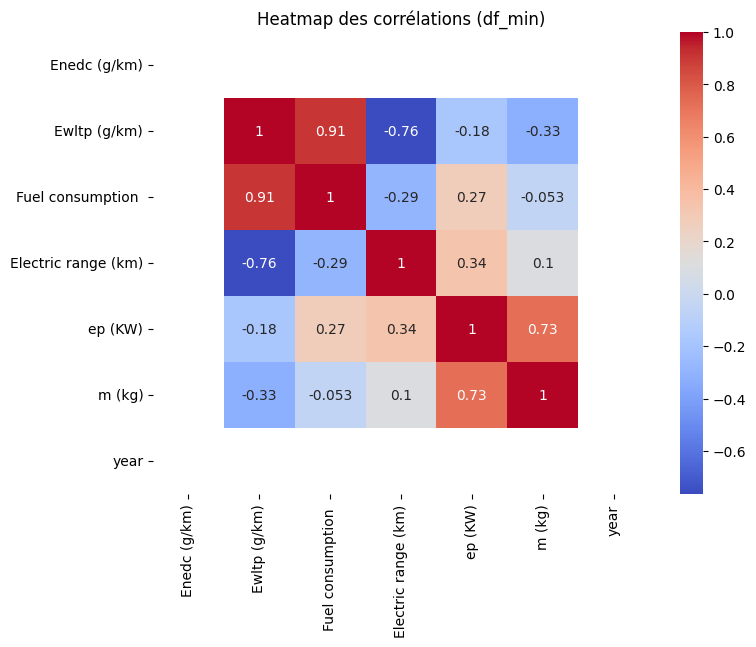

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_num = df_min.select_dtypes(include=["int64","float64"]).columns.tolist()

corr = df_min[colonnes_num].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations (df_min)")
plt.show()

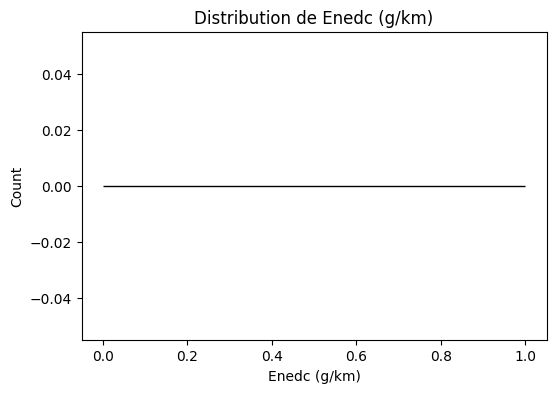

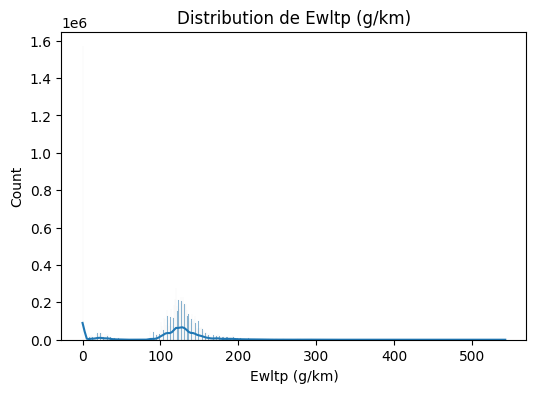

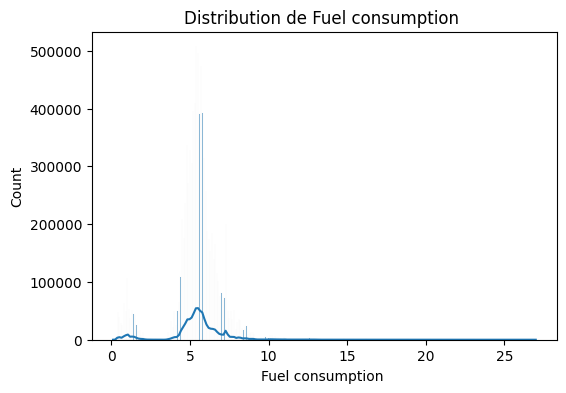

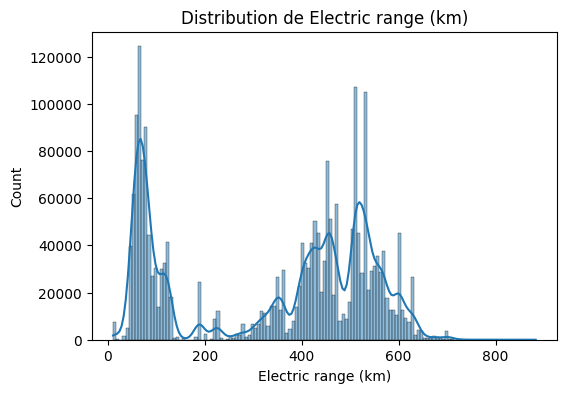

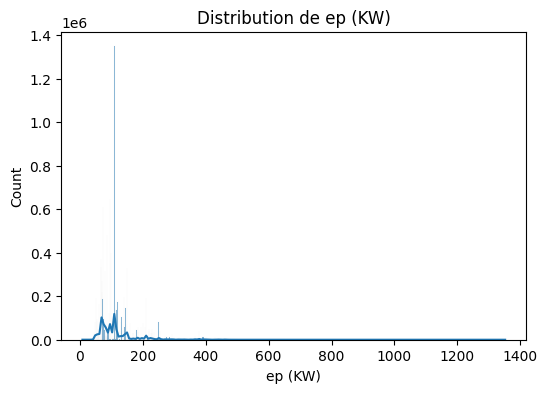

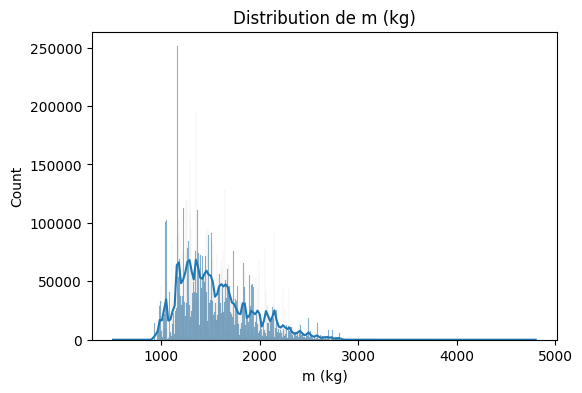

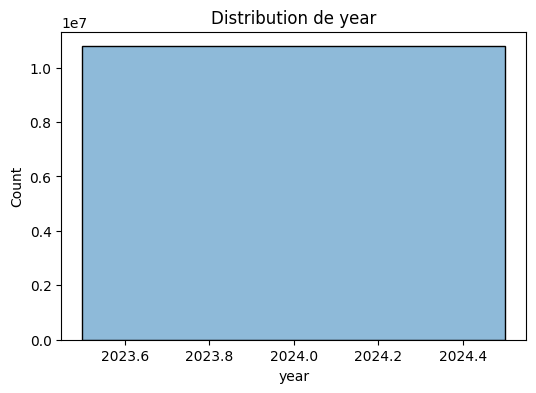

In [ ]:
for col in colonnes_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df_min[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

In [ ]:
colonnes_minimal = [
    "Ewltp (g/km)",
    "Fuel consumption ",
    "Electric range (km)",
    "ep (KW)",
    "m (kg)"
]

df_min = df[colonnes_minimal].copy()

df_min.shape, df_min.head()
#Pourquoi retirer Enedc et year ? Enedc = 100% NaN, year = aucune variance → ne sert à rien en corrélation

((10779681, 5),
    Ewltp (g/km)  Fuel consumption   Electric range (km)  ep (KW)  m (kg)
 0         121.0                5.3                  NaN     92.0  1440.0
 1           0.0                NaN                343.0    100.0  2267.0
 2          16.0                0.7                 93.0    186.0  2039.0
 3         123.0                5.4                  NaN     92.0  1466.0
 4         108.0                4.8                  NaN     53.0  1020.0)

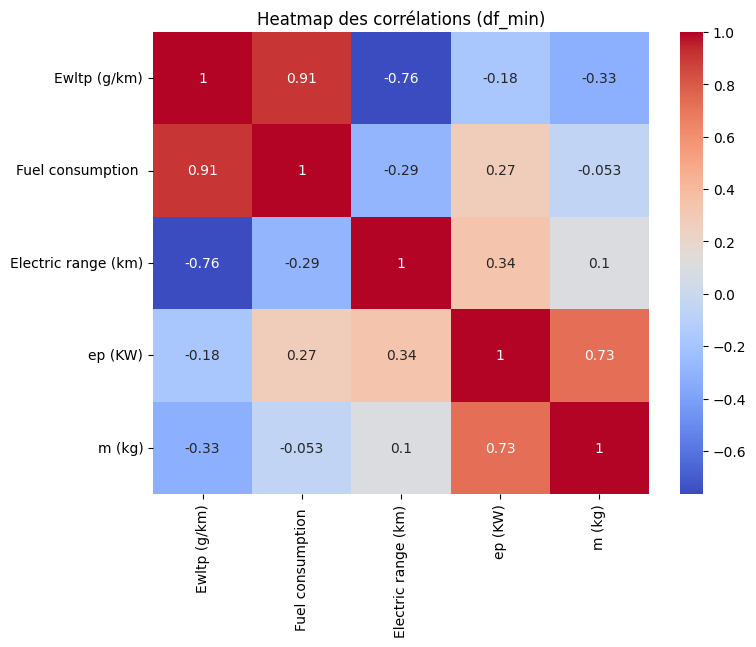

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_num = df_min.select_dtypes(include=["int64", "float64"]).columns.tolist()

corr = df_min[colonnes_num].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations (df_min)")
plt.show()


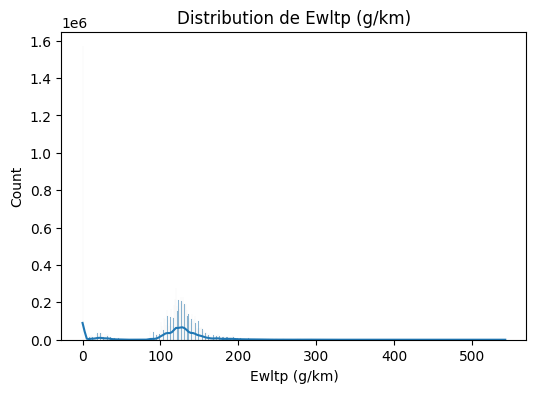

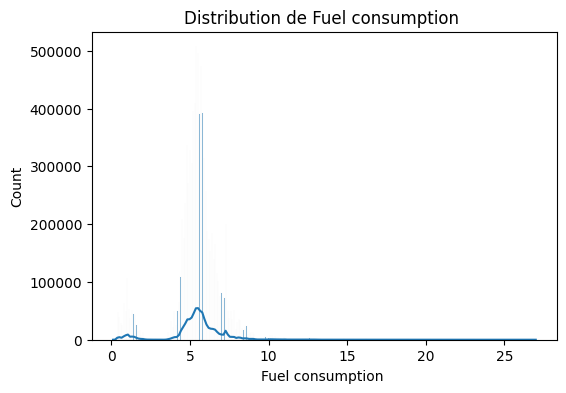

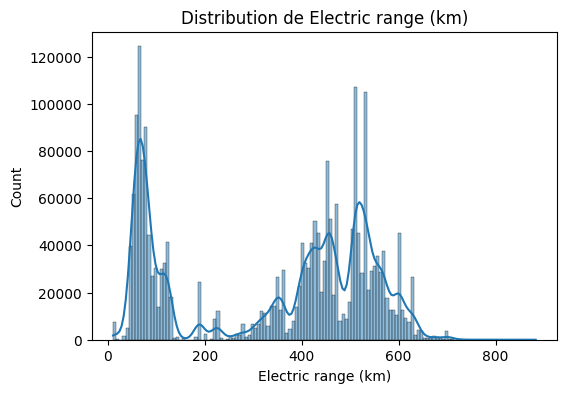

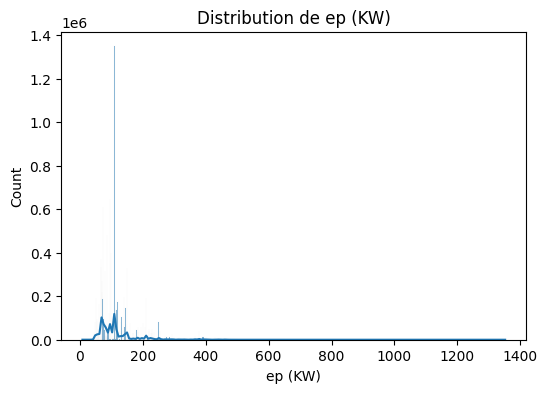

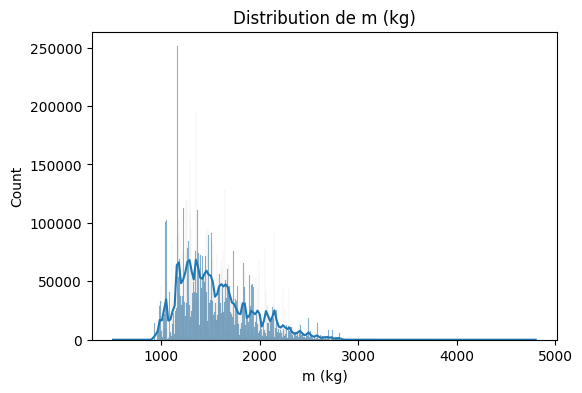

In [ ]:
for col in colonnes_num:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_min[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

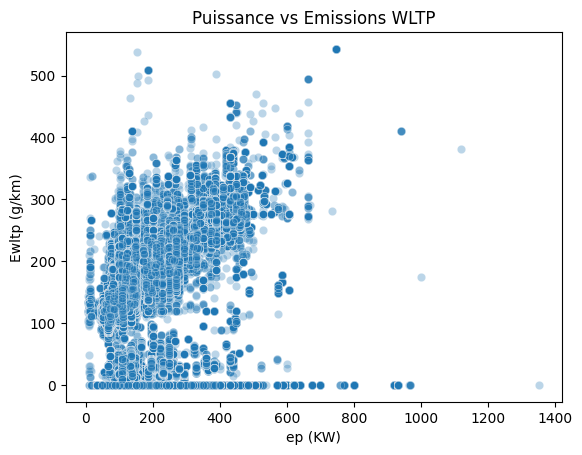

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_min, x="ep (KW)", y="Ewltp (g/km)", alpha=0.3)
plt.title("Puissance vs Emissions WLTP")
plt.show()

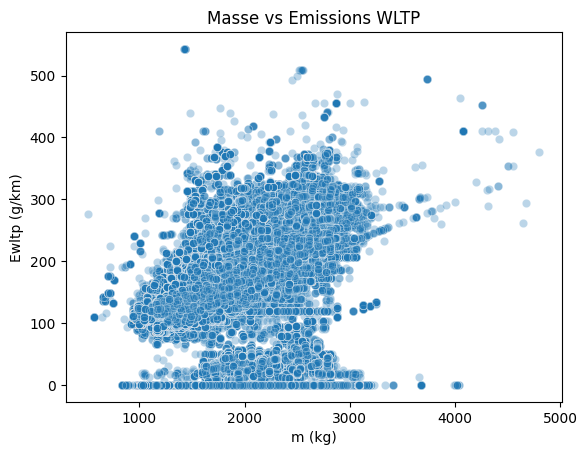

In [ ]:
sns.scatterplot(data=df_min, x="m (kg)", y="Ewltp (g/km)", alpha=0.3)
plt.title("Masse vs Emissions WLTP")
plt.show()

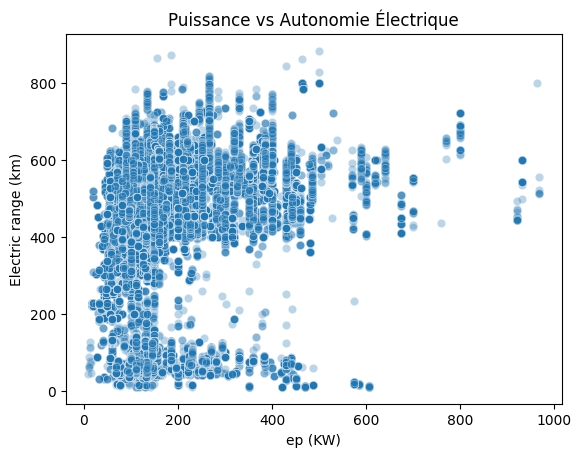

In [ ]:
sns.scatterplot(data=df_min, x="ep (KW)", y="Electric range (km)", alpha=0.3)
plt.title("Puissance vs Autonomie Électrique")
plt.show()

NETTOYAGE CAR BEAUCOUP DE DATA A 0

In [ ]:
df_min_clean = df_min.copy()

# 0 impossible pour emissions
df_min_clean.loc[df_min_clean["Ewltp (g/km)"] == 0, "Ewltp (g/km)"] = None

# 0 impossible pour consommation
df_min_clean.loc[df_min_clean["Fuel consumption "] == 0, "Fuel consumption "] = None

# 0 impossible pour puissance
df_min_clean.loc[df_min_clean["ep (KW)"] == 0, "ep (KW)"] = None

# 0 impossible pour masse
df_min_clean.loc[df_min_clean["m (kg)"] == 0, "m (kg)"] = None

# pour l’autonomie électrique : on retire
df_min_clean.loc[df_min_clean["Electric range (km)"] == 0, "Electric range (km)"] = None


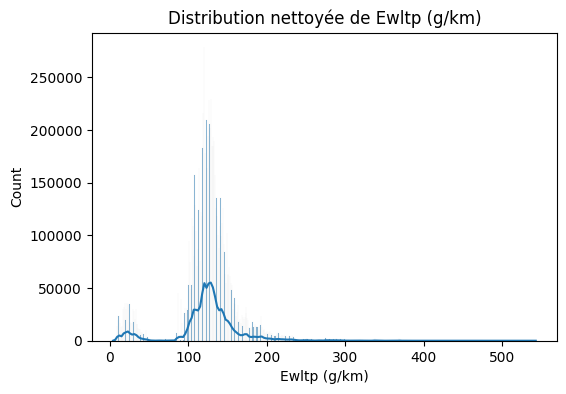

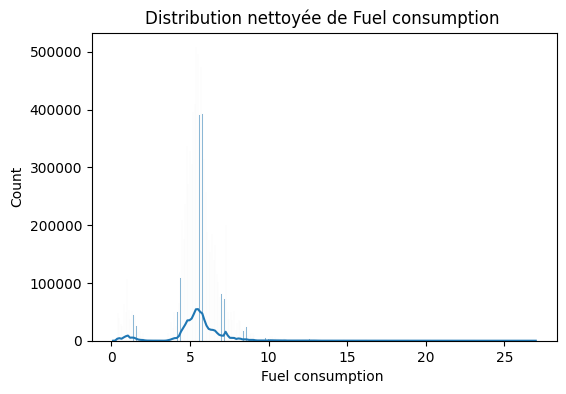

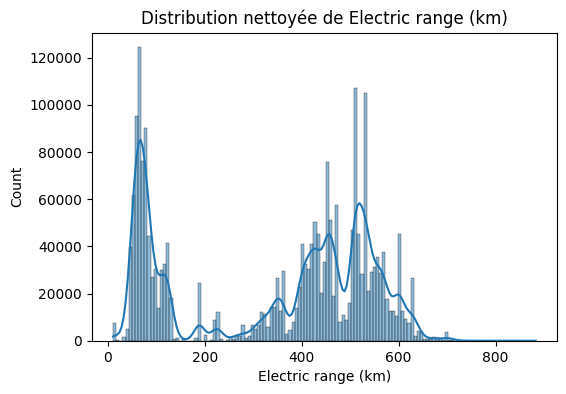

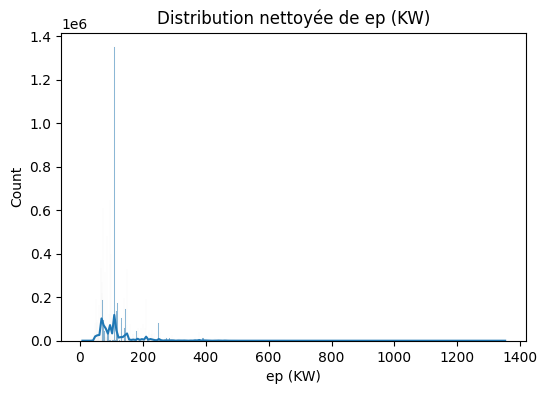

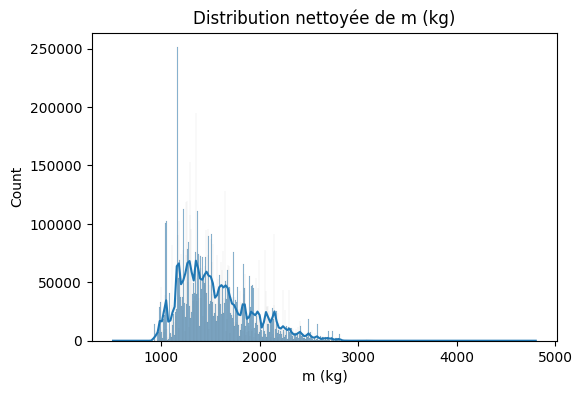

In [ ]:
colonnes_num = df_min_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()

for col in colonnes_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df_min_clean[col], kde=True)
    plt.title(f"Distribution nettoyée de {col}")
    plt.show()


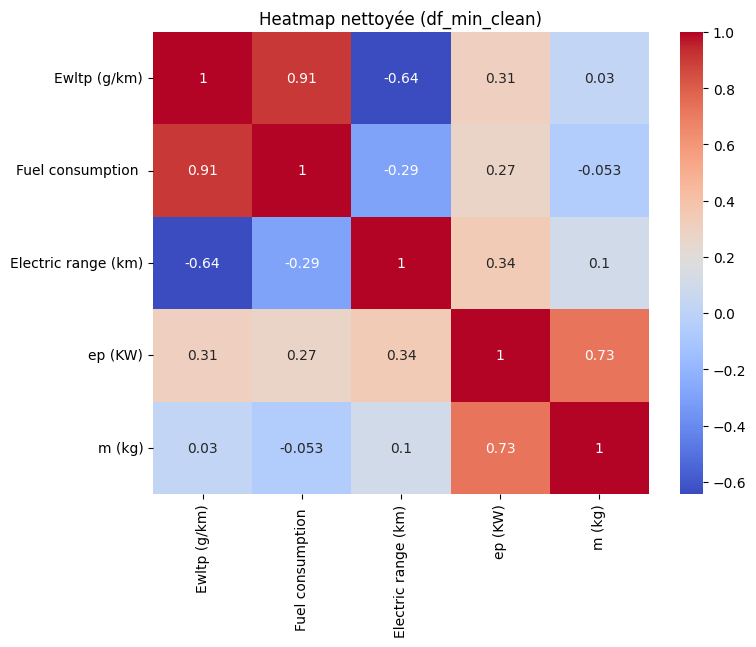

In [ ]:
corr = df_min_clean[colonnes_num].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap nettoyée (df_min_clean)")
plt.show()

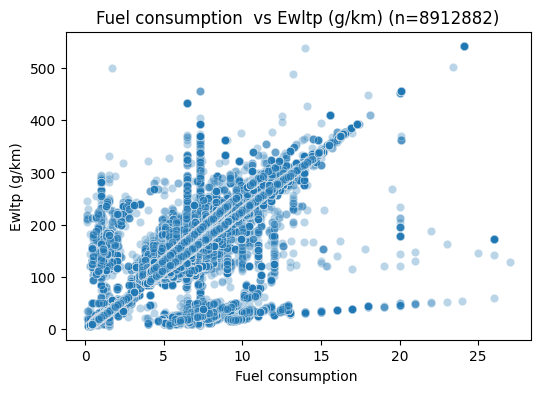

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_x = "Fuel consumption "
col_y = "Ewltp (g/km)"

df_plot = df_min_clean[[col_x, col_y]].dropna()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_plot[col_x], y=df_plot[col_y], alpha=0.3)
plt.title(f"{col_x} vs {col_y} (n={len(df_plot)})")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()


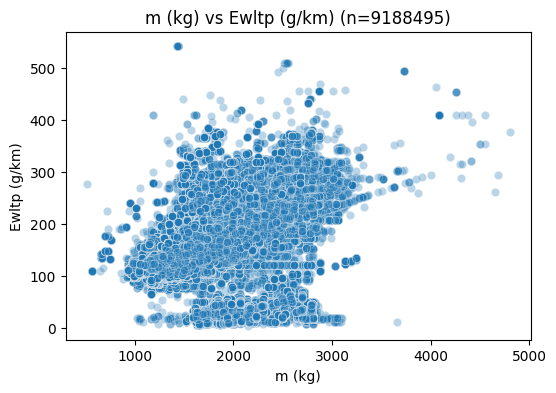

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_x = "m (kg)"
col_y = "Ewltp (g/km)"

df_plot = df_min_clean[[col_x, col_y]].dropna()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_plot[col_x], y=df_plot[col_y], alpha=0.3)
plt.title(f"{col_x} vs {col_y} (n={len(df_plot)})")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()

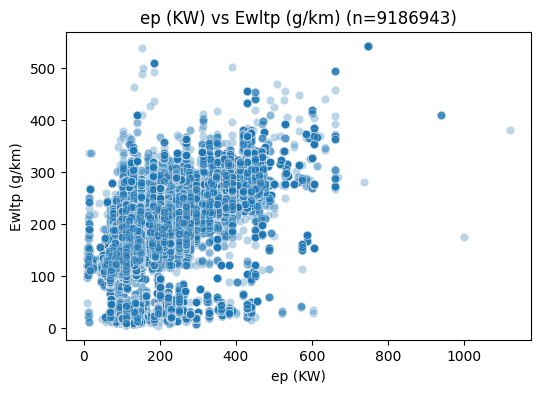

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_x = "ep (KW)"
col_y = "Ewltp (g/km)"

df_plot = df_min_clean[[col_x, col_y]].dropna()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_plot[col_x], y=df_plot[col_y], alpha=0.3)
plt.title(f"{col_x} vs {col_y} (n={len(df_plot)})")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()

In [ ]:
cols_base = [
    "Country",
    "ep (KW)",
    "m (kg)",
    "Ewltp (g/km)",
    "Fuel consumption ",
    "Electric range (km)",
    "z (Wh/km)",
    "Mp",
    "Mh",
    "ech",
    "IT"
]

df_pays = df[cols_base].copy()


In [ ]:
puissance_pays = (
    df_pays
    .dropna(subset=["Country", "ep (KW)"])
    .groupby("Country")["ep (KW)"]
    .agg(["count", "mean", "median", "max"])
    .sort_values("mean", ascending=False)
)

puissance_pays.head(20)


,count,mean,median,max
Country,,,,
NO,128599,233.766071,210.0,964.0
SE,267628,176.268694,150.0,1120.0
DK,171598,160.350027,150.0,1000.0
IS,9692,148.157862,131.0,932.0
BE,448950,133.320125,110.0,1352.0
NL,377394,133.221946,110.0,940.0
DE,2728233,130.722916,110.0,1300.0
EE,25396,125.467830,110.0,932.0
LV,17239,124.265213,110.0,607.0


| Code   | Pays (français)               |
| ------ | ----------------------------- |
| **NO** | Norvège                       |
| **SE** | Suède                         |
| **DK** | Danemark                      |
| **IS** | Islande                       |
| **BE** | Belgique                      |
| **NL** | Pays-Bas                      |
| **DE** | Allemagne                     |
| **EE** | Estonie                       |
| **LV** | Lettonie                      |
| **FI** | Finlande                      |
| **LU** | Luxembourg                    |
| **LT** | Lituanie                      |
| **BG** | Bulgarie                      |
| **HU** | Hongrie                       |
| **CY** | Chypre                        |
| **CZ** | Tchéquie (République tchèque) |
| **PL** | Pologne                       |
| **PT** | Portugal                      |
| **SK** | Slovaquie                     |
| **IE** | Irlande                       |



In [ ]:
df_energy = df_pays.dropna(subset=["Country"]).copy()

df_energy["type_energie_simple"] = "Thermique_ou_MHEV"
df_energy.loc[df_energy["Electric range (km)"].notna(), "type_energie_simple"] = "EV_ou_PHEV"


In [ ]:
part_ev_pays = (
    df_energy
    .groupby("Country")["type_energie_simple"]
    .apply(lambda s: (s == "EV_ou_PHEV").mean())
    .sort_values(ascending=False)
)

part_ev_pays.head(20)

,type_energie_simple
Country,
NO,0.914294
DK,0.554321
SE,0.535329
FI,0.510138
NL,0.486600
MT,0.426013
IS,0.425609
BE,0.415329
LU,0.355070


In [ ]:
df_mass = df_pays.dropna(subset=["Country", "m (kg)"]).copy()

masse_pays = (
    df_mass
    .groupby("Country")["m (kg)"]
    .agg(["count", "mean", "median", "max"])
    .sort_values("mean", ascending=False)
)

masse_pays.head(20)


,count,mean,median,max
Country,,,,
NO,128602,2036.340671,2070.0,3410.0
SE,267628,1866.009610,1905.0,4255.0
DK,171594,1797.152290,1845.0,4800.0
IS,9689,1794.845701,1784.0,2815.0
FI,71810,1743.586673,1733.0,3085.0
LU,46918,1707.819920,1665.0,3275.0
BE,448979,1681.593217,1625.0,3336.0
LV,17239,1648.521434,1588.0,3085.0
EE,25396,1642.008505,1580.0,3069.0


In [ ]:
df_mass["is_heavy"] = df_mass["m (kg)"] > 2000

part_heavy_pays = (
    df_mass
    .groupby("Country")["is_heavy"]
    .mean()
    .sort_values(ascending=False)
)

part_heavy_pays.head(20)


,is_heavy
Country,
NO,0.610706
SE,0.434543
DK,0.359715
IS,0.340696
FI,0.322365
LU,0.239013
BE,0.230118
AT,0.193983
NL,0.190597


In [ ]:
pays_focus = ["FR", "NO"]

cols_base = [
    "Country",
    "ep (KW)",
    "m (kg)",
    "Ewltp (g/km)",
    "Fuel consumption ",
    "Electric range (km)",
    "z (Wh/km)",
    "Mp",
    "Mh",
    "ech",
    "IT"
]

df_fn = df[df["Country"].isin(pays_focus)][cols_base].copy()


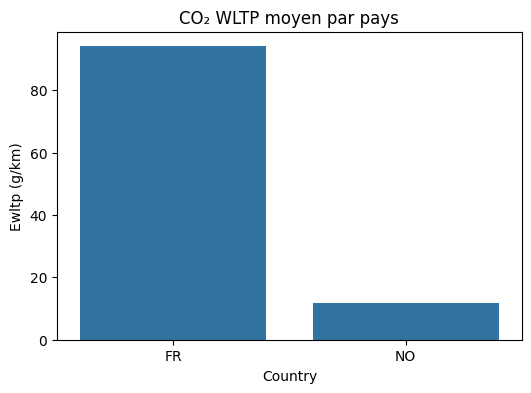

In [ ]:
tmp_co2 = (
    df_fn
    .dropna(subset=["Ewltp (g/km)"])
    .groupby("Country")["Ewltp (g/km)"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=tmp_co2, x="Country", y="Ewltp (g/km)")
plt.title("CO₂ WLTP moyen par pays")
plt.show()


In [ ]:
df_energy = df_fn.dropna(subset=["Country"]).copy()
df_energy["is_ev_phev"] = df_energy["Electric range (km)"].notna()

part_ev_phev = (
    df_energy
    .groupby("Country")["is_ev_phev"]
    .mean()
)

part_ev_phev


,is_ev_phev
Country,
FR,0.246986
NO,0.914294


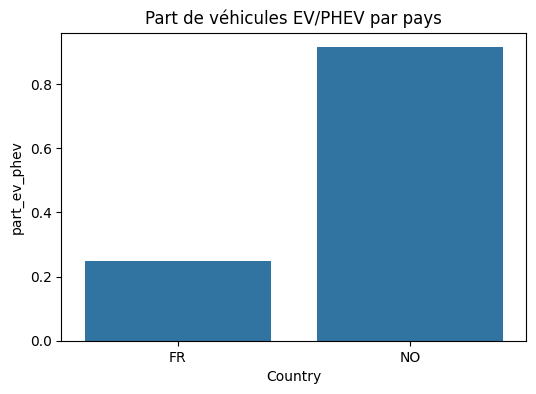

In [ ]:
tmp_ev = part_ev_phev.reset_index()
tmp_ev.columns = ["Country", "part_ev_phev"]

plt.figure(figsize=(6,4))
sns.barplot(data=tmp_ev, x="Country", y="part_ev_phev")
plt.title("Part de véhicules EV/PHEV par pays")
plt.show()


H1 – Plus un pays a de véhicules EV/PHEV, plus son CO₂ WLTP moyen est bas.

H2 – À puissance équivalente, les véhicules des pays très électrifiés émettent moins.

H3 – Les pays très électrifiés compensent la masse par une meilleure efficience énergétique.

H4 – Les véhicules norvégiens sont plus lourds mais plus “efficaces” en CO₂ par kW ou par kg que les véhicules français.

H5 – Les pays avec beaucoup de véhicules puissants ont une proportion plus forte de SUV / véhicules volumineux.

H6 – La différence entre Mt et m (kg) (charge utile potentielle) varie selon les pays et signale des usages différents (utilitaires vs tourisme).

H7 – Les véhicules électriques norvégiens sont plus efficients (moins de Wh/km) que ceux vendus en France, à masse équivalente.

H8 – Les EV norvégiens disposent de batteries plus grandes et d’une autonomie supérieure à ceux vendus en France.

H9 – Les PHEV contribuent fortement au CO₂ WLTP dans certains pays par rapport aux thermiques.

H10 – La France a plus de petites voitures ; la Norvège a plus de véhicules lourds électrifiés (>1700 kg).

H11 – À émissions équivalentes, la Norvège a des véhicules plus puissants (meilleure “décarbonation” technologique).

H12 – Pour un même type de motorisation (essence, diesel, hybride…), les émissions diffèrent sensiblement entre pays.

H13 – Les pays où les PHEV sont majoritaires ont des masses plus élevées mais pas forcément un CO₂ moyen plus élevé.

H14 – Les pays fortement électrifiés ont vu leurs émissions diminuer plus vite dans le temps (si données pluri-annuelles).

H15 – Certains pays misent sur le downsizing (baisse de cylindrée), d’autres sur l’électrification directe.

H16 – Les véhicules extrêmes (plus puissants, plus lourds, plus polluants, plus autonomes) sont concentrés dans certains pays ou segments.
